You need to implement Logistic Regression from scratch in this question

1. You are provided with the dataset of sign language digits. Implement logistic regression from scratch to classify the images provided in the dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Plot a diagram for the sigmoid function. This is used for binary classi cation. How do you modify it for multilabel dataset classification problems? State and Explain the methods used.
3. Use both one vs all and one vs one method for the above problem statement purpose.
4. Also get results using Log Reg from scikit learn.
5. Report accuracy score, Confusion matrix and any other metrics you feel useful and Compare the results - from all the three.



[BONUS]
6. Display few pictures with their predicted and original labels 
7. Do the results differ? State the reasons why it is so.


dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

                

In [126]:
import numpy as np
import pandas as pd
import random
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as  plt
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score

In [127]:
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label
X_train,X_test,Y_train,Y_test = train_test_split(x_l,y_l,test_size=0.30, random_state=42)
Y_train_label=[np.where(r==1)[0][0] for r in Y_train]
Y_train_label=np.array(Y_train_label)
Y_test_label=[np.where(r==1)[0][0] for r in Y_test]
Y_test_label=np.array(Y_test_label)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
X_train = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# ONE VS ALL METHOD

In [128]:
learning_rate = 0.01
no_of_iterations = 2000
m=X_train.shape[0]
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def logistic_regression(X_train,Y_train,iteration,learning_rate,m,method=False):
    if method==True: 
        Y_train=Y_train.reshape(Y_train.shape[0],1)
    theta = np.zeros((Y_train.shape[1],X_train.shape[1]))
    cost_arr = np.empty((0,Y_train.shape[1]))
    for i in range(0,no_of_iterations):
        lineq = np.dot(X_train, theta.T)
        h = sigmoid(lineq)
        cost = -1/m * ((Y_train * np.log(h)) + ((1-Y_train) * np.log(1-h)))
        cost = cost.sum(axis = 0)
        cost_arr = np.vstack((cost_arr, cost))
        delta = (learning_rate/m) * np.dot((h-Y_train).T, X_train)
        theta = theta - delta
    return theta,cost_arr
theta,cost_arr=logistic_regression(X_train,Y_train,no_of_iterations,learning_rate,m,False)

In [129]:
def predict_val(X_test,theta,Y_test):
    model_predict = sigmoid(np.dot(X_test, theta.T))
    predict = np.zeros((X_test.shape[0],1))
    for row in range(len(model_predict)):
        max_ind=-1
        max_val=-1
        for i in range(0,len(model_predict[row])):
            if model_predict[row][i]>max_val:
                max_val=model_predict[row][i]
                max_ind=i
        predict[row]=max_ind
    Y_test_label=[np.where(r==1)[0][0] for r in Y_test]
    Y_test_label=np.array(Y_test_label)
    count1=0
    for i in range(0,len(predict)):
        if predict[i]==Y_test_label[i]:
            count1+=1
    Acc=count1/X_test.shape[0]
    return Acc,predict


In [130]:
Acc,predict=predict_val(X_test,theta,Y_test)
print("Confusion Matrix\n",confusion_matrix(Y_test_label, predict))
print("\nClassification Report\n",classification_report(Y_test_label, predict))

Confusion Matrix
 [[48  2  0  0  0  1  2  0  0  2]
 [ 1 58  0  3  1  2  5  0  0  0]
 [ 0  2 54  3  5  4  2  0  6  0]
 [ 0  3  4 47  1  1  2  0  5  0]
 [ 0  3  1  1 39  4  1  2  0  1]
 [ 3  1  6  0  2 40  0  0  2  1]
 [ 2  2  8 12  0  7 27  0  3  4]
 [ 5  0  1  0  2  0  0 51  2  1]
 [ 0  0  8  5  8  0  0  2 37  0]
 [ 1  0  1  0  0  1  3  4  0 51]]

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        55
           1       0.82      0.83      0.82        70
           2       0.65      0.71      0.68        76
           3       0.66      0.75      0.70        63
           4       0.67      0.75      0.71        52
           5       0.67      0.73      0.70        55
           6       0.64      0.42      0.50        65
           7       0.86      0.82      0.84        62
           8       0.67      0.62      0.64        60
           9       0.85      0.84      0.84        61

    accuracy                   

# ONE VS ONE METHOD

In [131]:
Label_Combinations={"combination":[],"weight":[]}
W=[]
for i in range(0,Y_train.shape[1]):
    for j in range(i+1,Y_train.shape[1]):
        X_subset,Y_subset=[],[]
        for idx,label in enumerate(Y_train_label):
            if label==i:
                X_subset.append(X_train[idx])
                Y_subset.append(0)
            elif label==j:
                X_subset.append(X_train[idx])
                Y_subset.append(1)
        X_subset,Y_subset=np.array(X_subset),np.array(Y_subset)
        learning_rate = 0.01
        no_of_iterations = 2000
        m=X_subset.shape[0]
        theta,cost_arr=logistic_regression(X_subset,Y_subset,no_of_iterations,learning_rate,m,True)
        theta=theta.reshape(theta.shape[1])
        Label_Combinations["combination"].append([i,j])
        Label_Combinations["weight"].append(theta)

In [132]:
import statistics
def predict_val(X_test,theta,Comb):
    for_mode=[]
    model_predict = sigmoid(np.dot(X_test, theta.T))
    for i in range(model_predict.shape[1]):
        if model_predict[0][i]>0.5:
            for_mode.append(Comb[i][1])
        else:
            for_mode.append(Comb[i][0])
    return statistics.mode(for_mode)
            
Comb=np.array(Label_Combinations["combination"])
thetas=np.array(Label_Combinations["weight"])
Y_pred=[]
for idx,test_row in enumerate(X_test):
    test_row=test_row.reshape(test_row.shape[0],1)
    Y_pred.append(predict_val(test_row.T,thetas,Comb))        

In [133]:
print("Confusion Matrix\n",confusion_matrix(Y_test_label, Y_pred))
print("\nClassification Report\n",classification_report(Y_test_label, Y_pred))

Confusion Matrix
 [[52  2  0  0  0  0  1  0  0  0]
 [ 0 63  0  3  1  1  2  0  0  0]
 [ 0  1 57  3  3  5  2  1  4  0]
 [ 0  2  5 45  1  1  4  0  5  0]
 [ 1  3  1  0 40  3  1  2  0  1]
 [ 2  1  7  0  2 41  0  0  1  1]
 [ 1  2 12  7  0  3 35  0  3  2]
 [ 1  0  0  0  1  0  0 55  4  1]
 [ 0  0  7  1  6  0  0  2 44  0]
 [ 2  0  0  0  0  0  2  4  0 53]]

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        55
           1       0.85      0.90      0.88        70
           2       0.64      0.75      0.69        76
           3       0.76      0.71      0.74        63
           4       0.74      0.77      0.75        52
           5       0.76      0.75      0.75        55
           6       0.74      0.54      0.62        65
           7       0.86      0.89      0.87        62
           8       0.72      0.73      0.73        60
           9       0.91      0.87      0.89        61

    accuracy                   

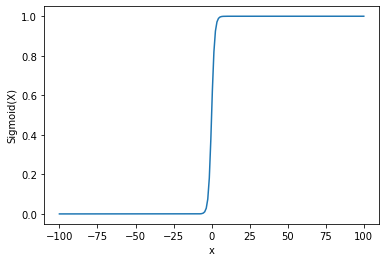

In [288]:
x = np.linspace(-100, 100, 200) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 


# SKLEARN METHOD

In [157]:
import warnings
warnings.filterwarnings("ignore")
x_l = np.load("X.npy") # image
y_l = np.load("Y.npy") # label
X_train,X_test,Y_train,Y_test = train_test_split(x_l,y_l,test_size=0.30, random_state=42)
Y_train_label=[np.where(r==1)[0][0] for r in Y_train]
Y_train_label=np.array(Y_train_label)
Y_test_label=[np.where(r==1)[0][0] for r in Y_test]
Y_test_label=np.array(Y_test_label)
X_train = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
#X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
#X_test = np.c_[np.ones(X_test.shape[0]), X_test]
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 2000)
logreg.fit(X_train, Y_train_label)
ypred=logreg.predict(X_test)

In [158]:
print("Confusion Matrix\n",confusion_matrix(Y_test_label, ypred))
print("\nClassification Report\n",classification_report(Y_test_label, ypred))

Confusion Matrix
 [[48  1  0  0  0  1  1  2  0  2]
 [ 2 54  0  4  1  1  8  0  0  0]
 [ 0  2 50  1  3  4  8  1  7  0]
 [ 0  0  3 46  1  1  6  0  6  0]
 [ 0  2  1  1 40  3  2  1  2  0]
 [ 2  0  6  0  3 38  3  0  2  1]
 [ 1  1 10  9  0  6 35  0  1  2]
 [ 1  0  0  0  3  0  0 55  2  1]
 [ 0  1  5  4  6  1  0  2 41  0]
 [ 2  0  0  0  0  0  4  2  0 53]]

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        55
           1       0.89      0.77      0.82        70
           2       0.67      0.66      0.66        76
           3       0.71      0.73      0.72        63
           4       0.70      0.77      0.73        52
           5       0.69      0.69      0.69        55
           6       0.52      0.54      0.53        65
           7       0.87      0.89      0.88        62
           8       0.67      0.68      0.68        60
           9       0.90      0.87      0.88        61

    accuracy                   

Predicted_value = 2
test_value = 2


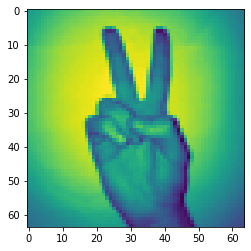

In [134]:
x = np.delete(X_test,0,axis=1)
def fun1():
    n=random.randint(0,X_test.shape[0])
    plt.imshow(x[n].reshape(x_l.shape[1],x_l.shape[2]))
    print("Predicted_value =",Y_pred[n])
    print("test_value =",Y_pred[n])
fun1()

Predicted_value = 7
test_value = 7


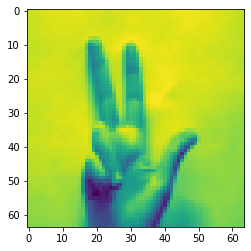

In [142]:
fun1()

Predicted_value = 3
test_value = 3


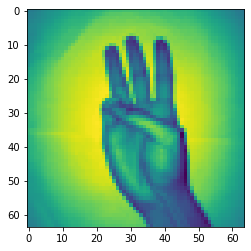

In [146]:
fun1()

Predicted_value = 8
test_value = 8


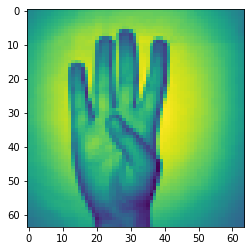

In [156]:
fun1()